# Exercise 2.3: Complex Machine Learning Models and Keras Part 2

### 1. Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [5]:
path = r'C:\Users\Nuria Miquel\Desktop\nuria\Machine Learning'

In [123]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'weather_cleaned2.csv'), index_col = False)

In [24]:
pleasant= pd.read_csv(os.path.join(path, 'Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [125]:
df.head()

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101                  7            0.85           1.018   
1  19600102                  6            0.84           1.018   
2  19600103                  8            0.90           1.018   
3  19600104                  3            0.92           1.018   
4  19600105                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3            10.1  ...                 5.0   
2              8.5             5.1             9.9  ...                 4.1   
3              6.3             3.8            10.6  ...                 2.3   
4              3.0            -0.7             6.0  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 136 columns]

In [28]:
X.shape

(22950, 136)

In [41]:
pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [30]:
pleasant.shape

(22950, 16)

### 2. Data Wrangling (Decade)

In [133]:
decade =df[(df['DATE'].astype(str).str[:4] >= '2010') & (df['DATE'].astype(str).str[:4] <= '2019')]

In [39]:
decade_pleasant = pleasant[(pleasant['DATE'].astype(str).str[:4] >= '2000') & (pleasant['DATE'].astype(str).str[:4] <= '2019')]

And now we drop the DATE column to proceed with the model

In [50]:
decade.drop(['DATE'], axis=1, inplace=True)

KeyError: "['DATE'] not found in axis"

In [48]:
decade_pleasant.drop(['DATE'], axis=1, inplace=True)

C:\Users\Nuria Miquel\AppData\Local\Temp\ipykernel_18024\711608512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_pleasant.drop(['DATE'], axis=1, inplace=True)


In [54]:
decade.shape

(3653, 135)

In [56]:
decade_pleasant.shape

(3653, 15)

### 3. Reshaping

In [59]:
X = decade

In [61]:
y = decade_pleasant

In [63]:
X = np.array(X)
y = np.array(y)

In [65]:
X.shape

(3653, 135)

In [67]:
y.shape

(3653, 15)

### 4. Data Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [72]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


### 5. Plotting Random Forest

In [78]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [80]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5514223194748359


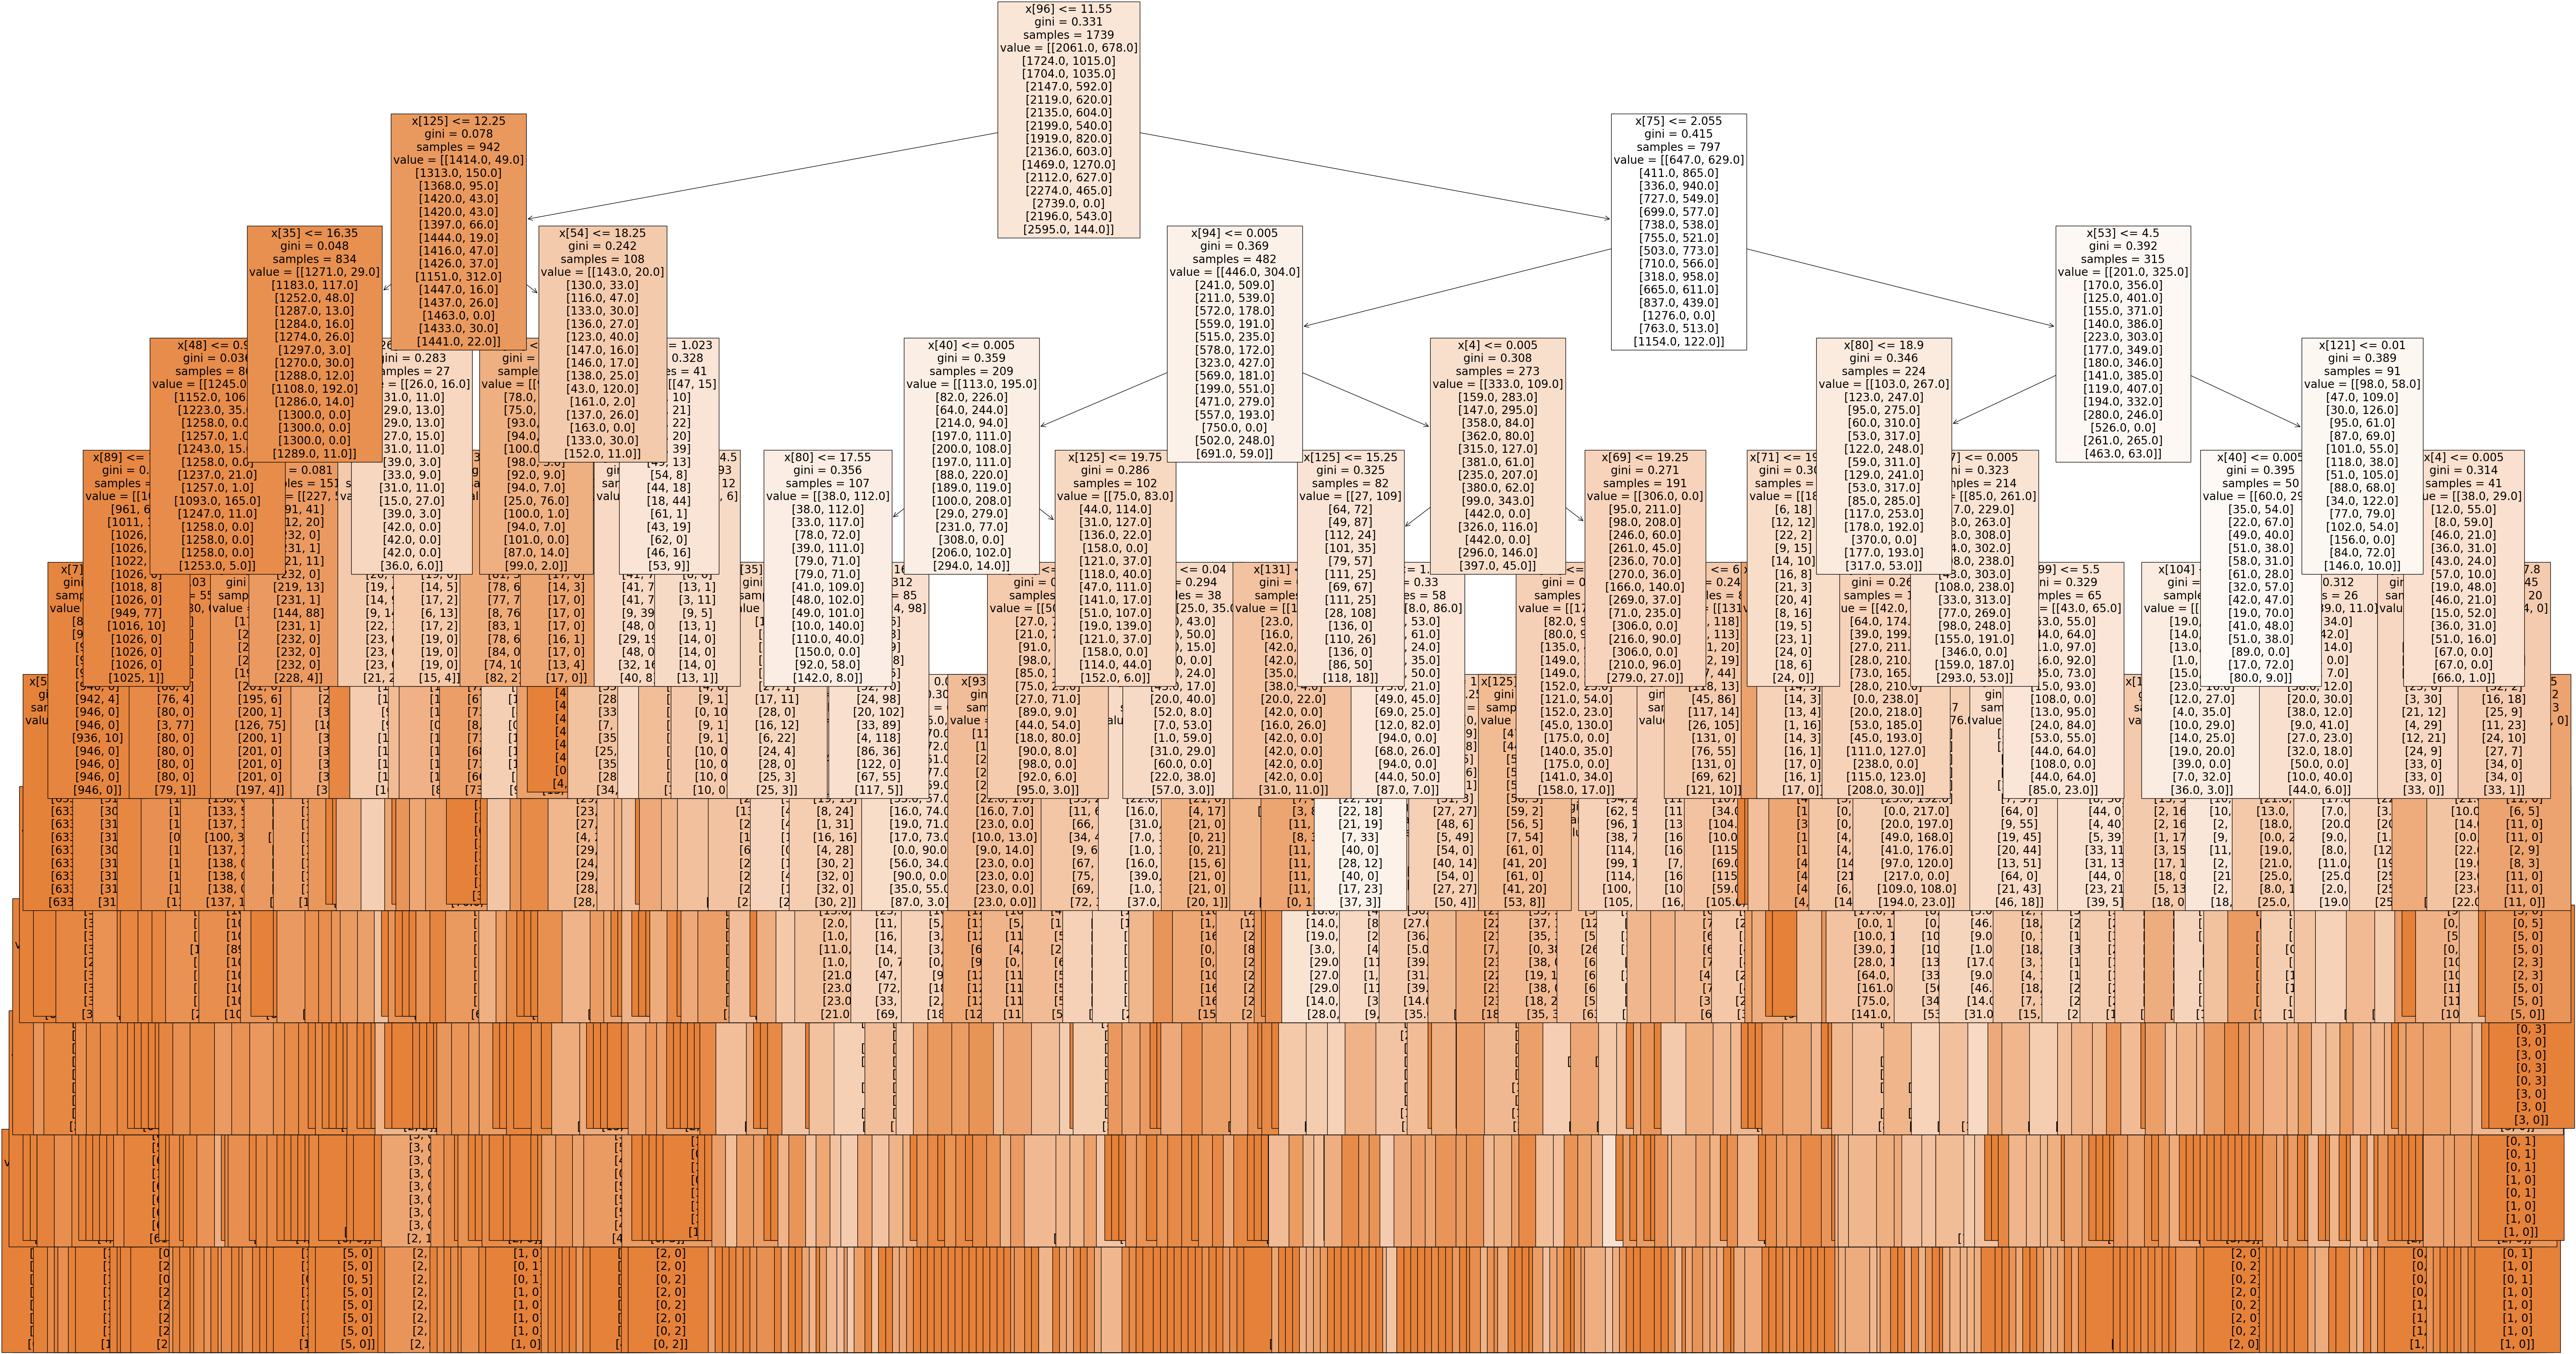

In [84]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, filled=True);

In [86]:
fig.savefig(os.path.join(path, 'Figures', 'random_forest_00.png'))

### 6. Feature Importances

In [94]:
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([0.00211838, 0.00234699, 0.00244423, 0.00452505, 0.01417251,
       0.00593327, 0.00747375, 0.00743842, 0.02334848, 0.00257952,
       0.00295936, 0.00280911, 0.00268409, 0.01625419, 0.0041768 ,
       0.01088686, 0.00215583, 0.01059817, 0.0024337 , 0.00274838,
       0.00235977, 0.00560762, 0.0109639 , 0.00454662, 0.01271279,
       0.00554717, 0.02436623, 0.0037429 , 0.00180823, 0.0050604 ,
       0.00366724, 0.0189221 , 0.00485444, 0.00721177, 0.00178664,
       0.03052953, 0.00710565, 0.00254301, 0.00369721, 0.00362261,
       0.02438252, 0.00898573, 0.03506551, 0.0015916 , 0.02629796,
       0.0016958 , 0.00280602, 0.00270162, 0.0029246 , 0.00815703,
       0.00309751, 0.00991944, 0.00208413, 0.00573982, 0.02101542,
       0.00245473, 0.00398454, 0.00255288, 0.01035805, 0.00294779,
       0.02175972, 0.00212682, 0.01348298, 0.00379526, 0.00308999,
       0.00234943, 0.00389949, 0.02011655, 0.00365658, 0.00468172,
       0.00263359, 0.02291193, 0.00618468, 0.00187643, 0.00417

In [96]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00211838, 0.00234699, 0.00244423, 0.00452505, 0.01417251,
         0.00593327, 0.00747375, 0.00743842, 0.02334848],
        [0.00257952, 0.00295936, 0.00280911, 0.00268409, 0.01625419,
         0.0041768 , 0.01088686, 0.00215583, 0.01059817],
        [0.0024337 , 0.00274838, 0.00235977, 0.00560762, 0.0109639 ,
         0.00454662, 0.01271279, 0.00554717, 0.02436623],
        [0.0037429 , 0.00180823, 0.0050604 , 0.00366724, 0.0189221 ,
         0.00485444, 0.00721177, 0.00178664, 0.03052953],
        [0.00710565, 0.00254301, 0.00369721, 0.00362261, 0.02438252,
         0.00898573, 0.03506551, 0.0015916 , 0.02629796],
        [0.0016958 , 0.00280602, 0.00270162, 0.0029246 , 0.00815703,
         0.00309751, 0.00991944, 0.00208413, 0.00573982],
        [0.02101542, 0.00245473, 0.00398454, 0.00255288, 0.01035805,
         0.00294779, 0.02175972, 0.00212682, 0.01348298],
        [0.00379526, 0.00308999, 0.00234943, 0.00389949, 0.02011655,
         0.00365658, 0.00468172, 0.0026335

In [98]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.06980108, 0.05510392, 0.07128619, 0.07758324, 0.11329179,
       0.03912598, 0.08068294, 0.06713454, 0.12619427, 0.0592902 ,
       0.1032402 , 0.04180613, 0.02168616, 0.05002813, 0.02374521])

In [104]:
stations = [col.split('_')[0] for col in decade.columns if '_' in col]

In [106]:
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [108]:
unique_stations_list = list(unique_stations)

In [110]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

MADRID        0.126194
DUSSELDORF    0.113292
VALENTIA      0.103240
KASSEL        0.080683
MUNCHENB      0.077583
SONNBLICK     0.071286
STOCKHOLM     0.069801
BELGRADE      0.067135
BUDAPEST      0.059290
HEATHROW      0.055104
MAASTRICHT    0.050028
LJUBLJANA     0.041806
BASEL         0.039126
OSLO          0.023745
DEBILT        0.021686
dtype: float64

['STOCKHOLM', 'HEATHROW', 'SONNBLICK', 'MUNCHENB', 'DUSSELDORF', 'BASEL', 'KASSEL', 'BELGRADE', 'MADRID', 'BUDAPEST', 'VALENTIA', 'LJUBLJANA', 'DEBILT', 'MAASTRICHT', 'OSLO']


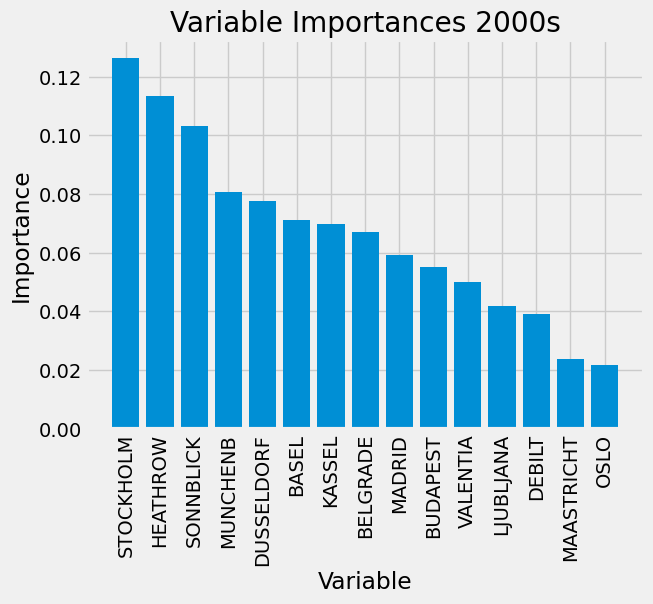

In [171]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(unique_stations_list)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, unique_stations_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances 2000s');

### 7. Stockholm

In [141]:
df_stock = df[df.columns[df.columns.astype(str).str.startswith('STOCKHOLM')]]
df_stock.head()

STOCKHOLM_humidity  STOCKHOLM_cloud_cover  STOCKHOLM_pressure  \
0                0.98                      5              1.0114   
1                0.62                      5              1.0114   
2                0.69                      5              1.0114   
3                0.98                      5              1.0114   
4                0.96                      5              1.0114   

   STOCKHOLM_global_radiation  STOCKHOLM_precipitation  STOCKHOLM_sunshine  \
0                        0.05                     0.32                 0.0   
1                        0.05                     0.06                 0.0   
2                        0.05                     0.02                 0.0   
3                        0.05                     0.00                 0.0   
4                        0.05                     1.32                 0.0   

   STOCKHOLM_temp_mean  STOCKHOLM_temp_min  STOCKHOLM_temp_max  
0                  4.2                 2.2                 4.9  
1                  4.0                 3.0                 5.0  
2                  2.4                 1.3                 4.1  
3                  1.2                 0.4                 2.3  
4                  3.3                 0.8                 4.3

In [145]:
stock_pleasant = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('STOCKHOLM')]]
stock_pleasant.head()

STOCKHOLM_pleasant_weather
0                           0
1                           0
2                           0
3                           0
4                           0

In [147]:
print(df_stock.shape)
print(stock_pleasant.shape)

(22950, 9)
(22950, 1)


In [149]:
stock_pleasant = stock_pleasant['STOCKHOLM_pleasant_weather']

In [151]:
print(stock_pleasant.shape)

(22950,)


#### · Reshape

In [155]:
X2 = df_stock
y2 = stock_pleasant

In [157]:
X2 = np.array(X2)
y2 = np.array(y2)

In [159]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 42)

In [161]:
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#### · Random Forest

In [163]:
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=3)

In [165]:
y2_pred = clf_2.predict(X2_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y2_test, y2_pred))

Model Accuracy:  0.9973858487277797


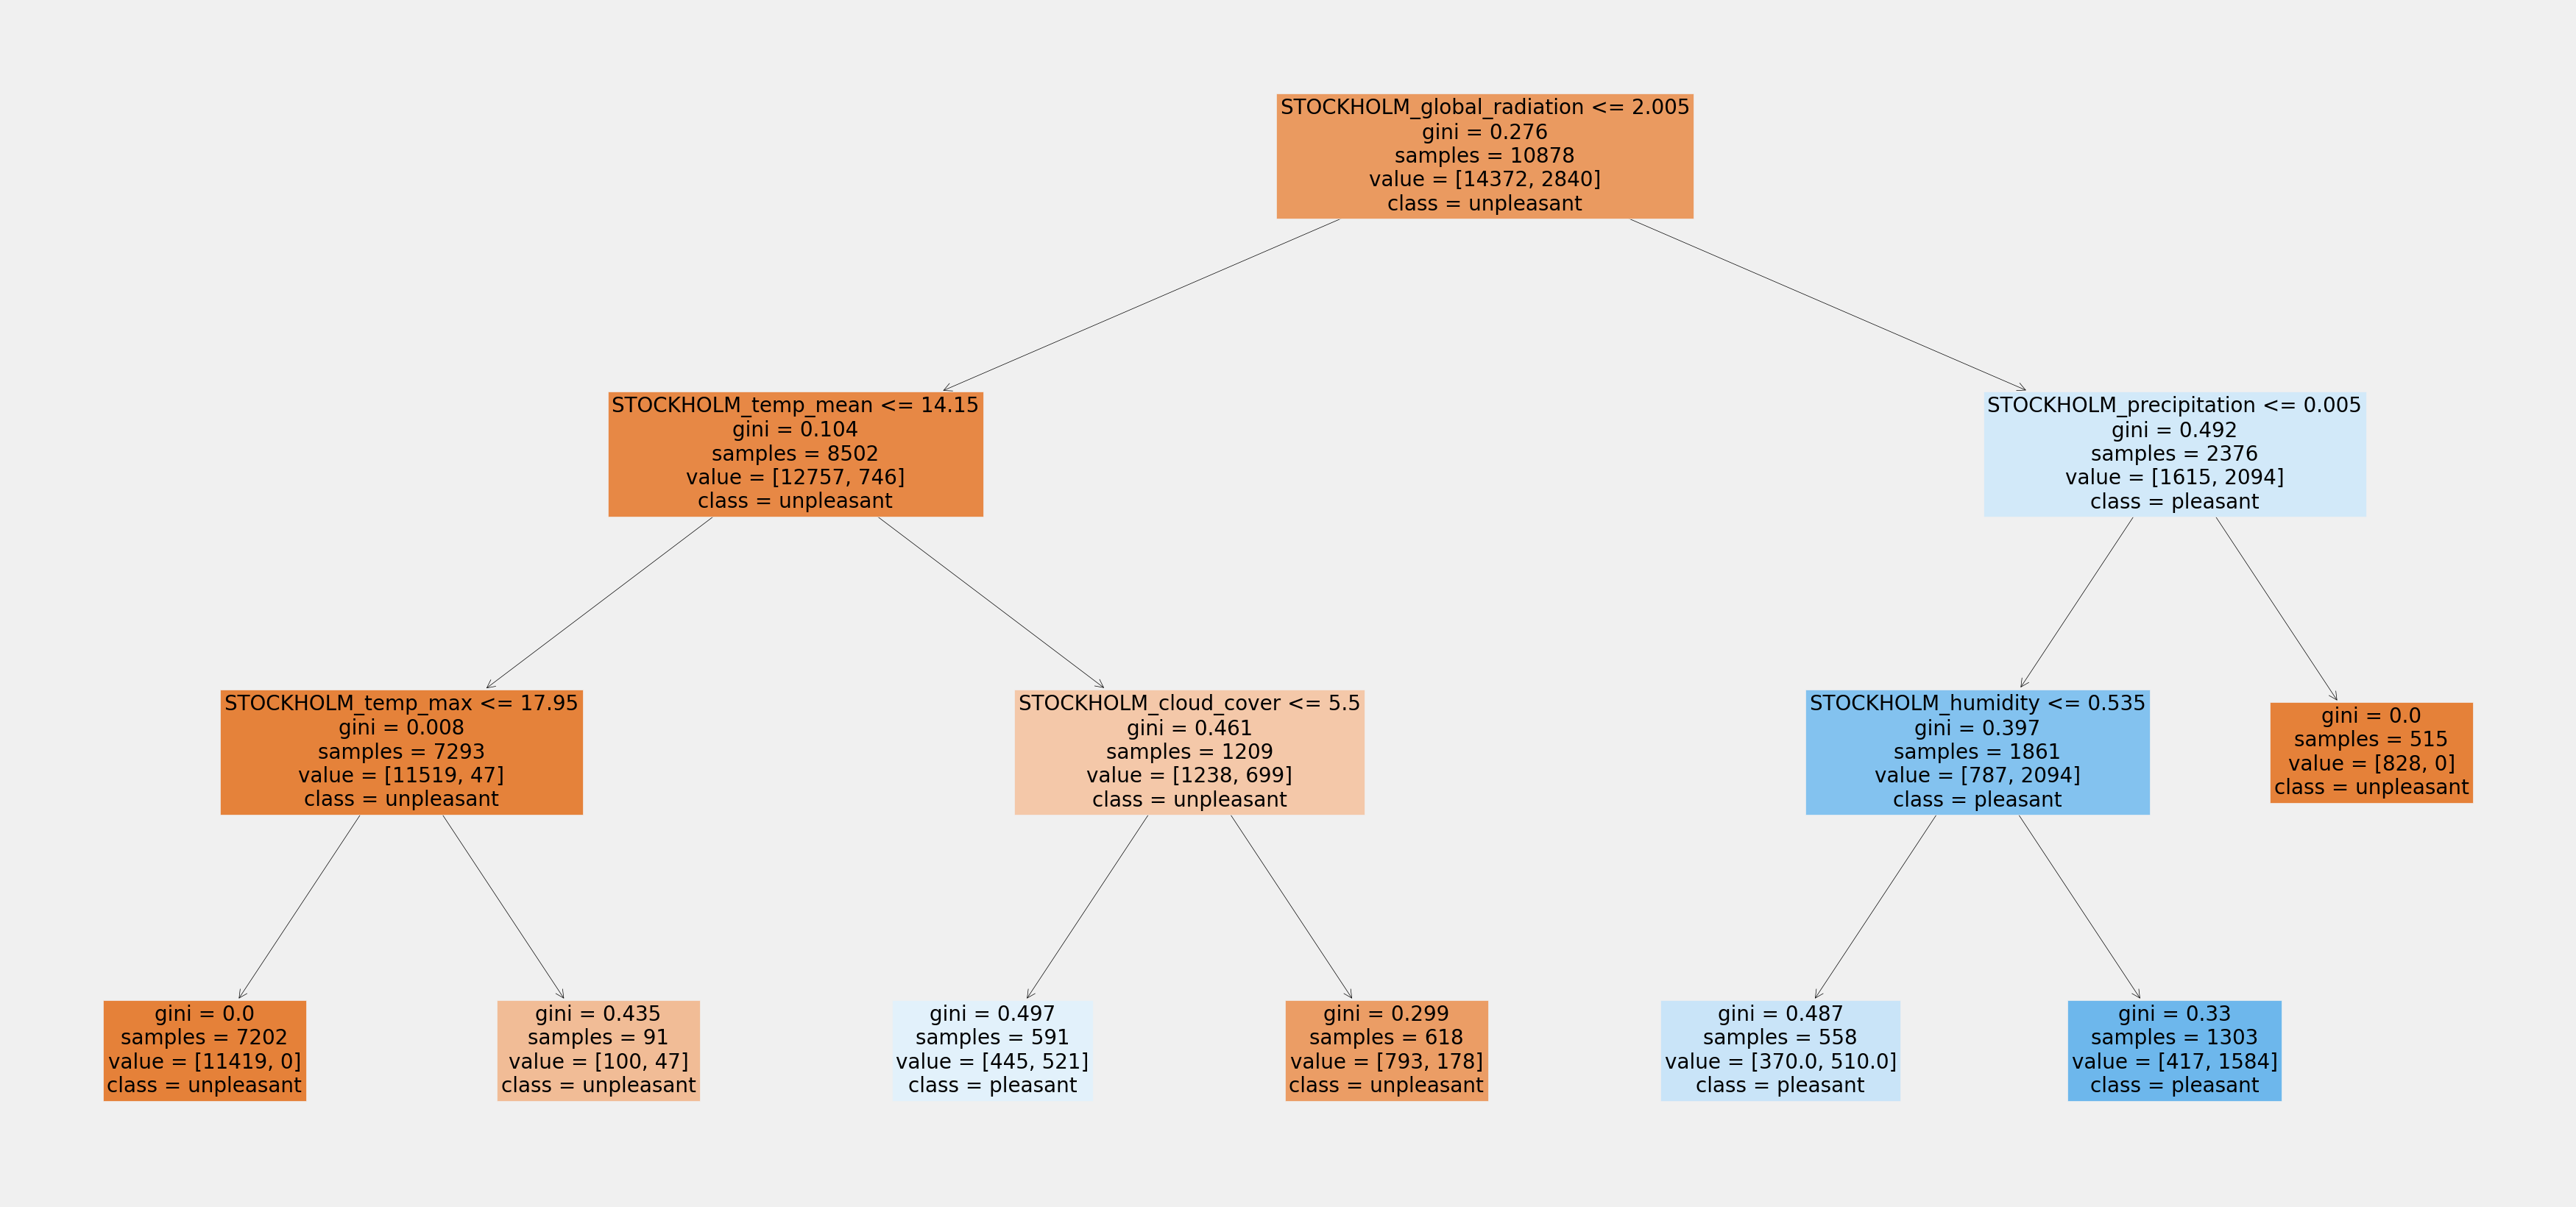

In [167]:
rf_2 = plt.figure(figsize=(40,20))
plot_tree(clf_2.estimators_[5], fontsize = 20, feature_names=df_stock.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [173]:
rf_2.savefig(os.path.join(path, 'Figures', 'random_forest_stockholm.png'))

#### · Importances

In [257]:
# Create a list for the measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [259]:
importances_2 = clf_2.feature_importances_
print(clf.feature_importances_.shape)
importances_2

(135,)


array([0.00046076, 0.02558487, 0.00993196, 0.12397933, 0.17844209,
       0.0811988 , 0.1768055 , 0.0715797 , 0.332017  ])

In [263]:
# Create a dataframe to associate observation measurements with their importances
importances_df2 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': importances_2
})

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


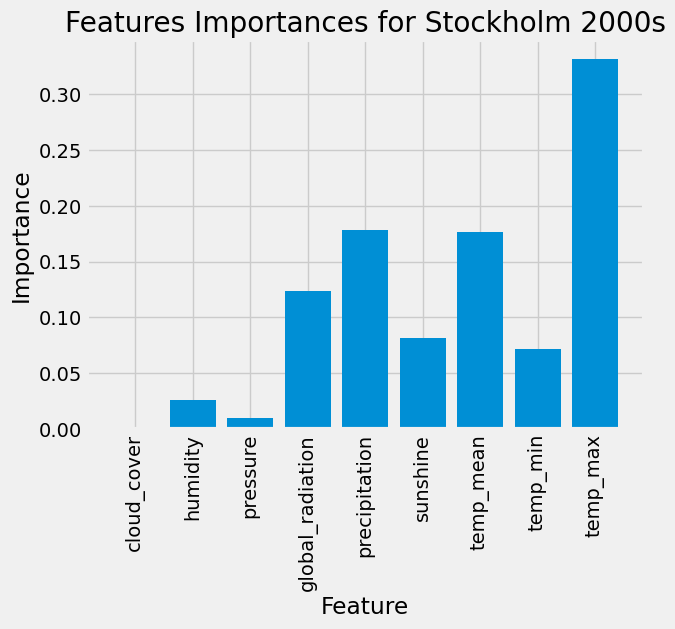

In [293]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x2_values = list(range(len(importances_2)))
print(measurements)

plt.bar(x2_values, importances_2, orientation = 'vertical')
plt.xticks(x2_values, measurements, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Stockholm 2000s');

In [273]:
plt.savefig(os.path.join(path, 'Figures', 'Stockholm_importances.png'))

<Figure size 640x480 with 0 Axes>

### 8. Heathrow

In [177]:
df_heath = df[df.columns[df.columns.astype(str).str.startswith('HEATHROW')]]
df_heath.head()

HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0                     7               0.91             1.0010   
1                     7               0.98             1.0051   
2                     8               0.96             1.0166   
3                     8               0.98             1.0230   
4                     5               0.84             1.0275   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.13                    0.22                0.0   
1                       0.13                    0.23                0.0   
2                       0.15                    0.07                0.1   
3                       0.13                    0.00                0.0   
4                       0.30                    0.00                2.1   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  
0                10.6                9.4                8.3  
1                 6.1                3.9               10.6  
2                 8.4                6.1               12.2  
3                 9.4                6.7                8.9  
4                 8.9                8.9                7.2

In [179]:
heath_pleasant = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('HEATHROW')]]
heath_pleasant.head()

HEATHROW_pleasant_weather
0                          0
1                          0
2                          0
3                          0
4                          0

In [183]:
print(df_heath.shape)
print(heath_pleasant.shape)

(22950, 9)
(22950, 1)


In [185]:
heath_pleasant = heath_pleasant['HEATHROW_pleasant_weather']

In [189]:
heath_pleasant.shape

(22950,)

#### · Reshape

In [192]:
X3 = df_heath
y3 = heath_pleasant

In [194]:
X3 = np.array(X3)
y3 = np.array(y3)

In [196]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,random_state = 42)

In [198]:
print(X3_train.shape, y3_train.shape)
print(X3_test.shape, y3_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#### · Random forest

In [200]:
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X3_train, y3_train)

RandomForestClassifier(max_depth=3)

In [202]:
y3_pred = clf_3.predict(X3_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y3_test, y3_pred))

Model Accuracy:  0.9994771697455559


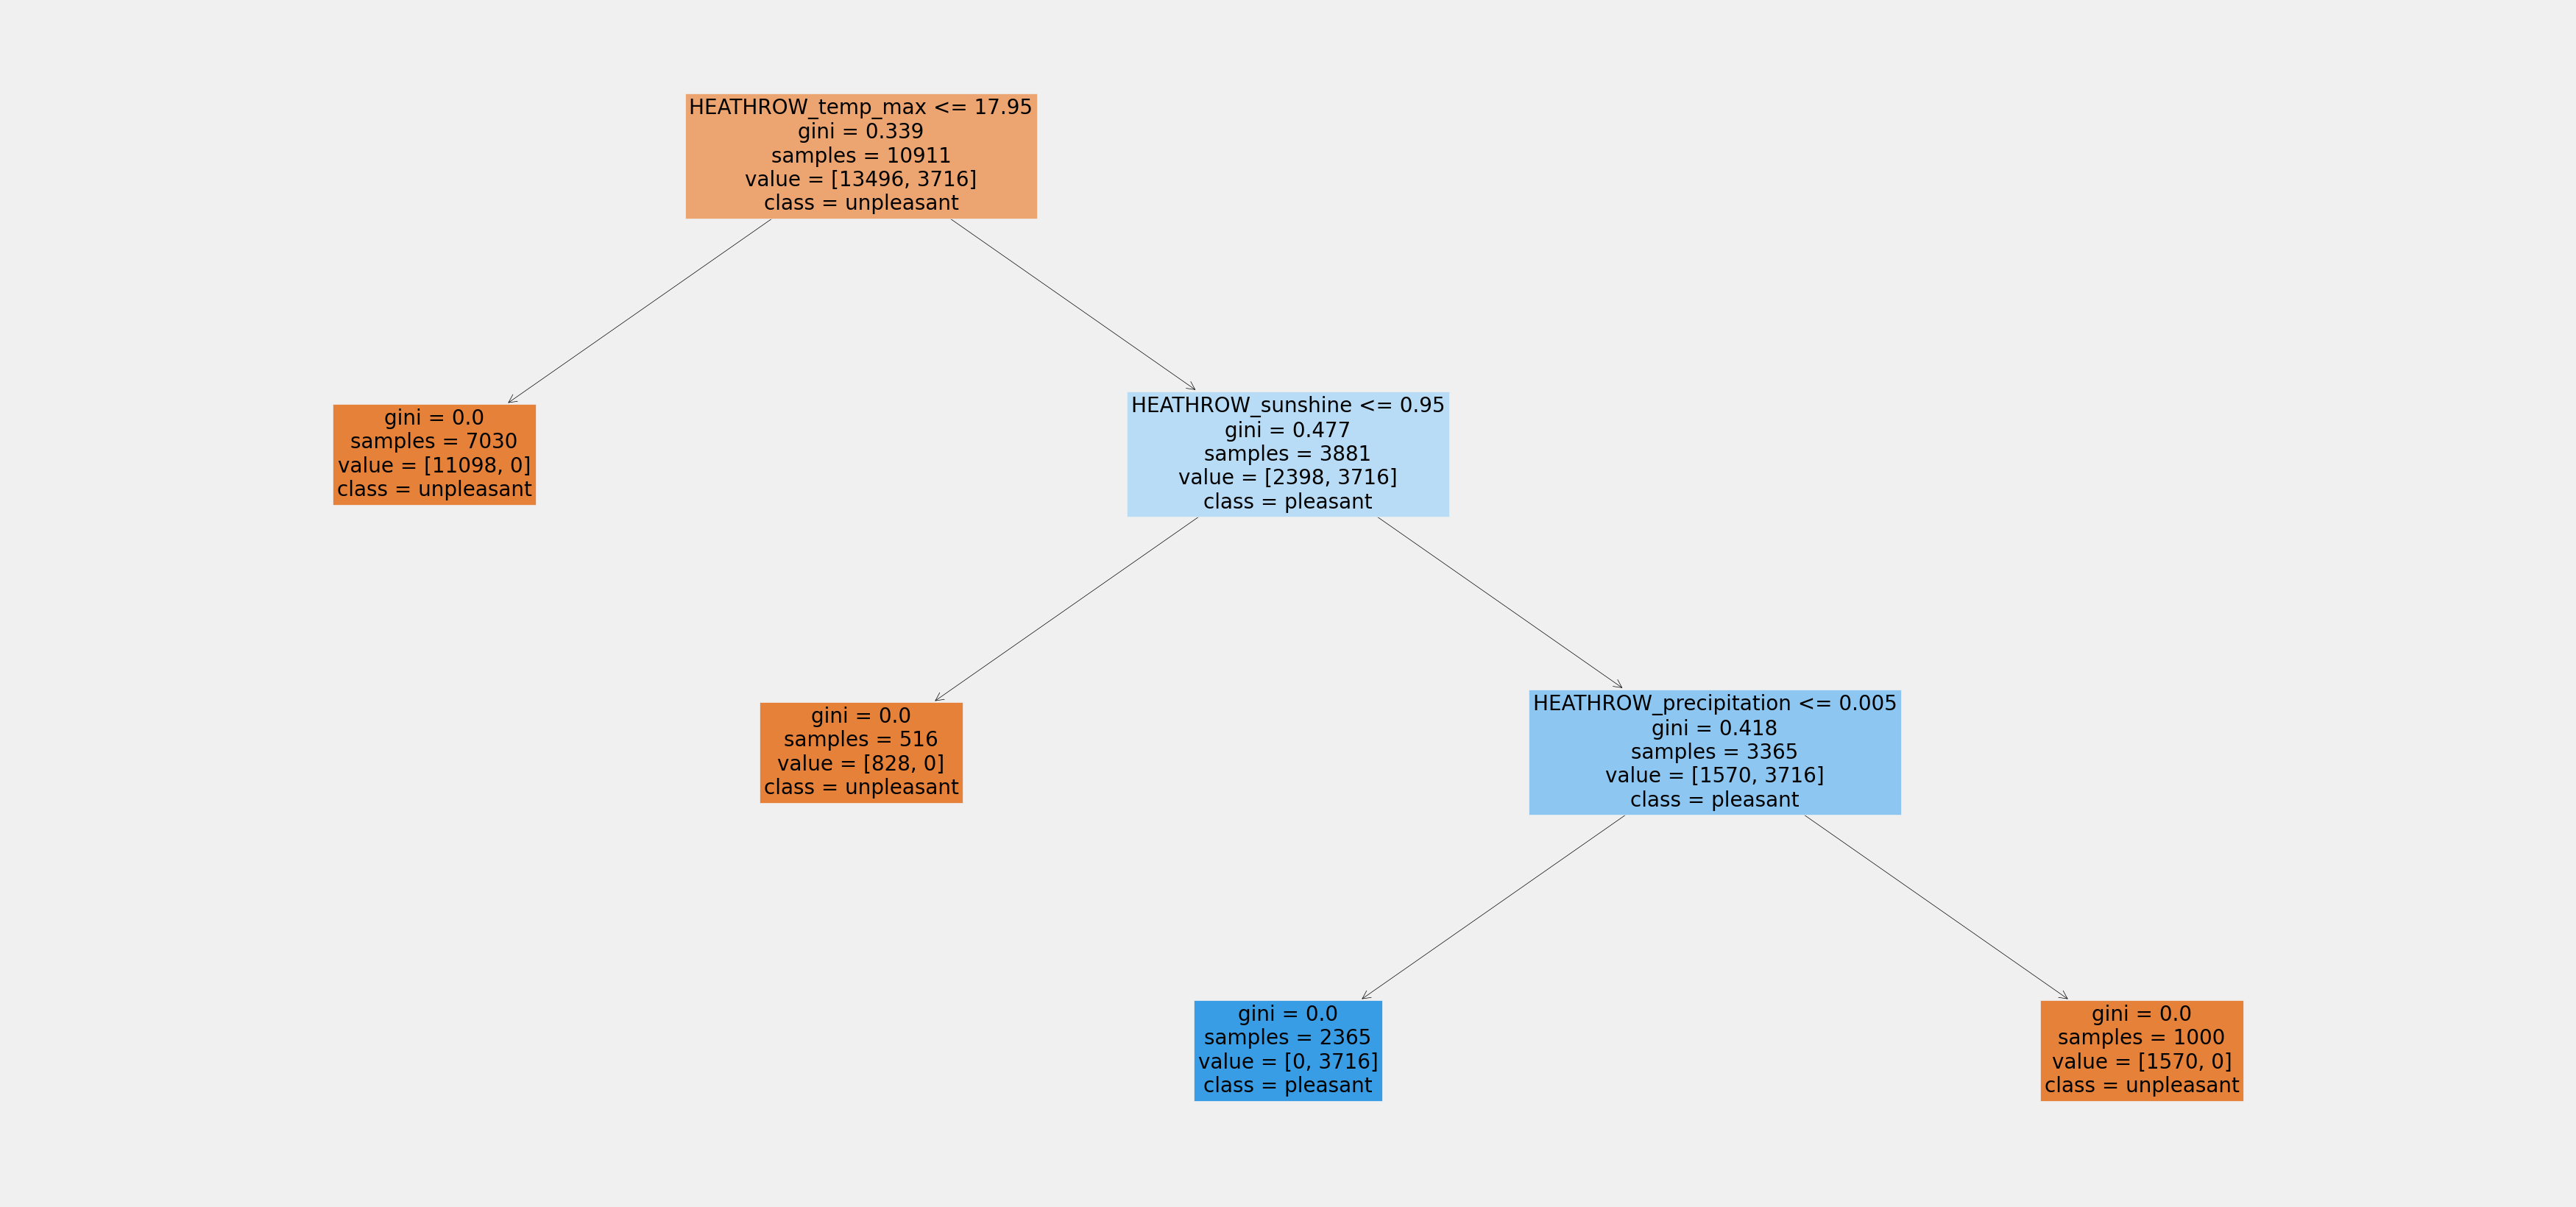

In [208]:
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_heath.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [210]:
rf_3.savefig(os.path.join(path, 'Figures', 'random_forest_heathrow.png'))

#### · Importances

In [277]:
importances_3 = clf_3.feature_importances_
print(clf.feature_importances_.shape)
importances_3

(135,)


array([0.00982906, 0.03233389, 0.01351522, 0.07449375, 0.23740072,
       0.08185964, 0.14657485, 0.01740026, 0.38659261])

In [279]:
# Create a dataframe to associate observation measurements with their importances
importances_df3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': importances_3
})

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


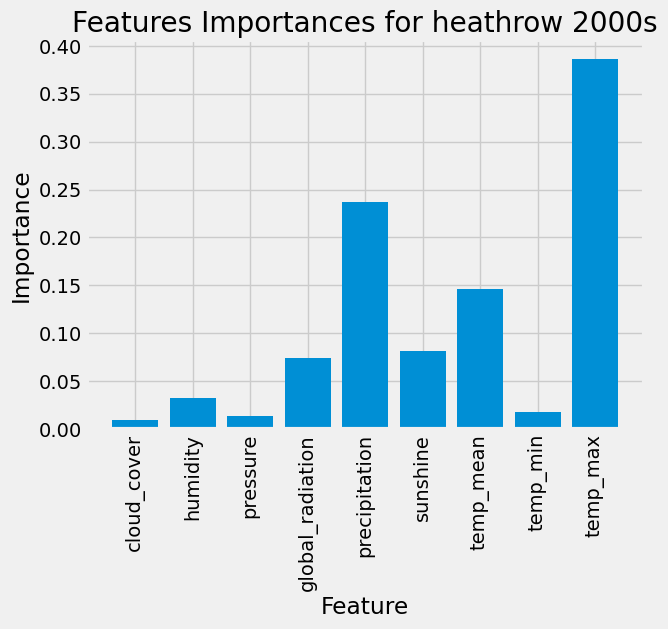

In [301]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x3_values = list(range(len(importances_3)))
print(measurements)

plt.bar(x3_values, importances_3, orientation = 'vertical')
plt.xticks(x3_values, measurements, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for heathrow 2000s');

### 9. Sonnblick

In [214]:
df_sonn = df[df.columns[df.columns.astype(str).str.startswith('SONNBLICK')]]
df_sonn.head()

SONNBLICK_cloud_cover  SONNBLICK_humidity  SONNBLICK_pressure  \
0                      4                0.73              1.0304   
1                      6                0.97              1.0292   
2                      8                0.93              1.0320   
3                      5                0.93              1.0443   
4                      2                0.75              1.0430   

   SONNBLICK_global_radiation  SONNBLICK_precipitation  SONNBLICK_sunshine  \
0                        0.48                     0.01                 2.3   
1                        0.21                     0.61                 0.0   
2                        0.21                     3.20                 0.0   
3                        0.22                     1.10                 0.0   
4                        0.72                     0.01                 6.1   

   SONNBLICK_temp_mean  SONNBLICK_temp_min  SONNBLICK_temp_max  
0                 -5.9                -8.5                -3.2  
1                 -9.5               -10.5                -8.5  
2                 -9.5               -10.0                -8.9  
3                -11.5               -12.9               -10.0  
4                 -9.3               -12.0                -6.5

In [216]:
sonn_pleasant = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('SONNBLICK')]]
sonn_pleasant.head()

SONNBLICK_pleasant_weather
0                           0
1                           0
2                           0
3                           0
4                           0

In [220]:
print(df_sonn.shape)
print(sonn_pleasant.shape)

(22950, 9)
(22950, 1)


In [222]:
sonn_pleasant = sonn_pleasant['SONNBLICK_pleasant_weather']

In [224]:
sonn_pleasant.shape

(22950,)

#### · Reshape

In [227]:
X4 = df_sonn
y4 = sonn_pleasant

In [229]:
X4 = np.array(X4)
y4 = np.array(y4)

In [231]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,random_state = 42)

In [233]:
print(X4_train.shape, y4_train.shape)
print(X4_test.shape, y4_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#### · Random Forest

In [235]:
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X4_train, y4_train)

RandomForestClassifier(max_depth=3)

In [237]:
y4_pred = clf_4.predict(X4_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y4_test, y4_pred))

Model Accuracy:  1.0


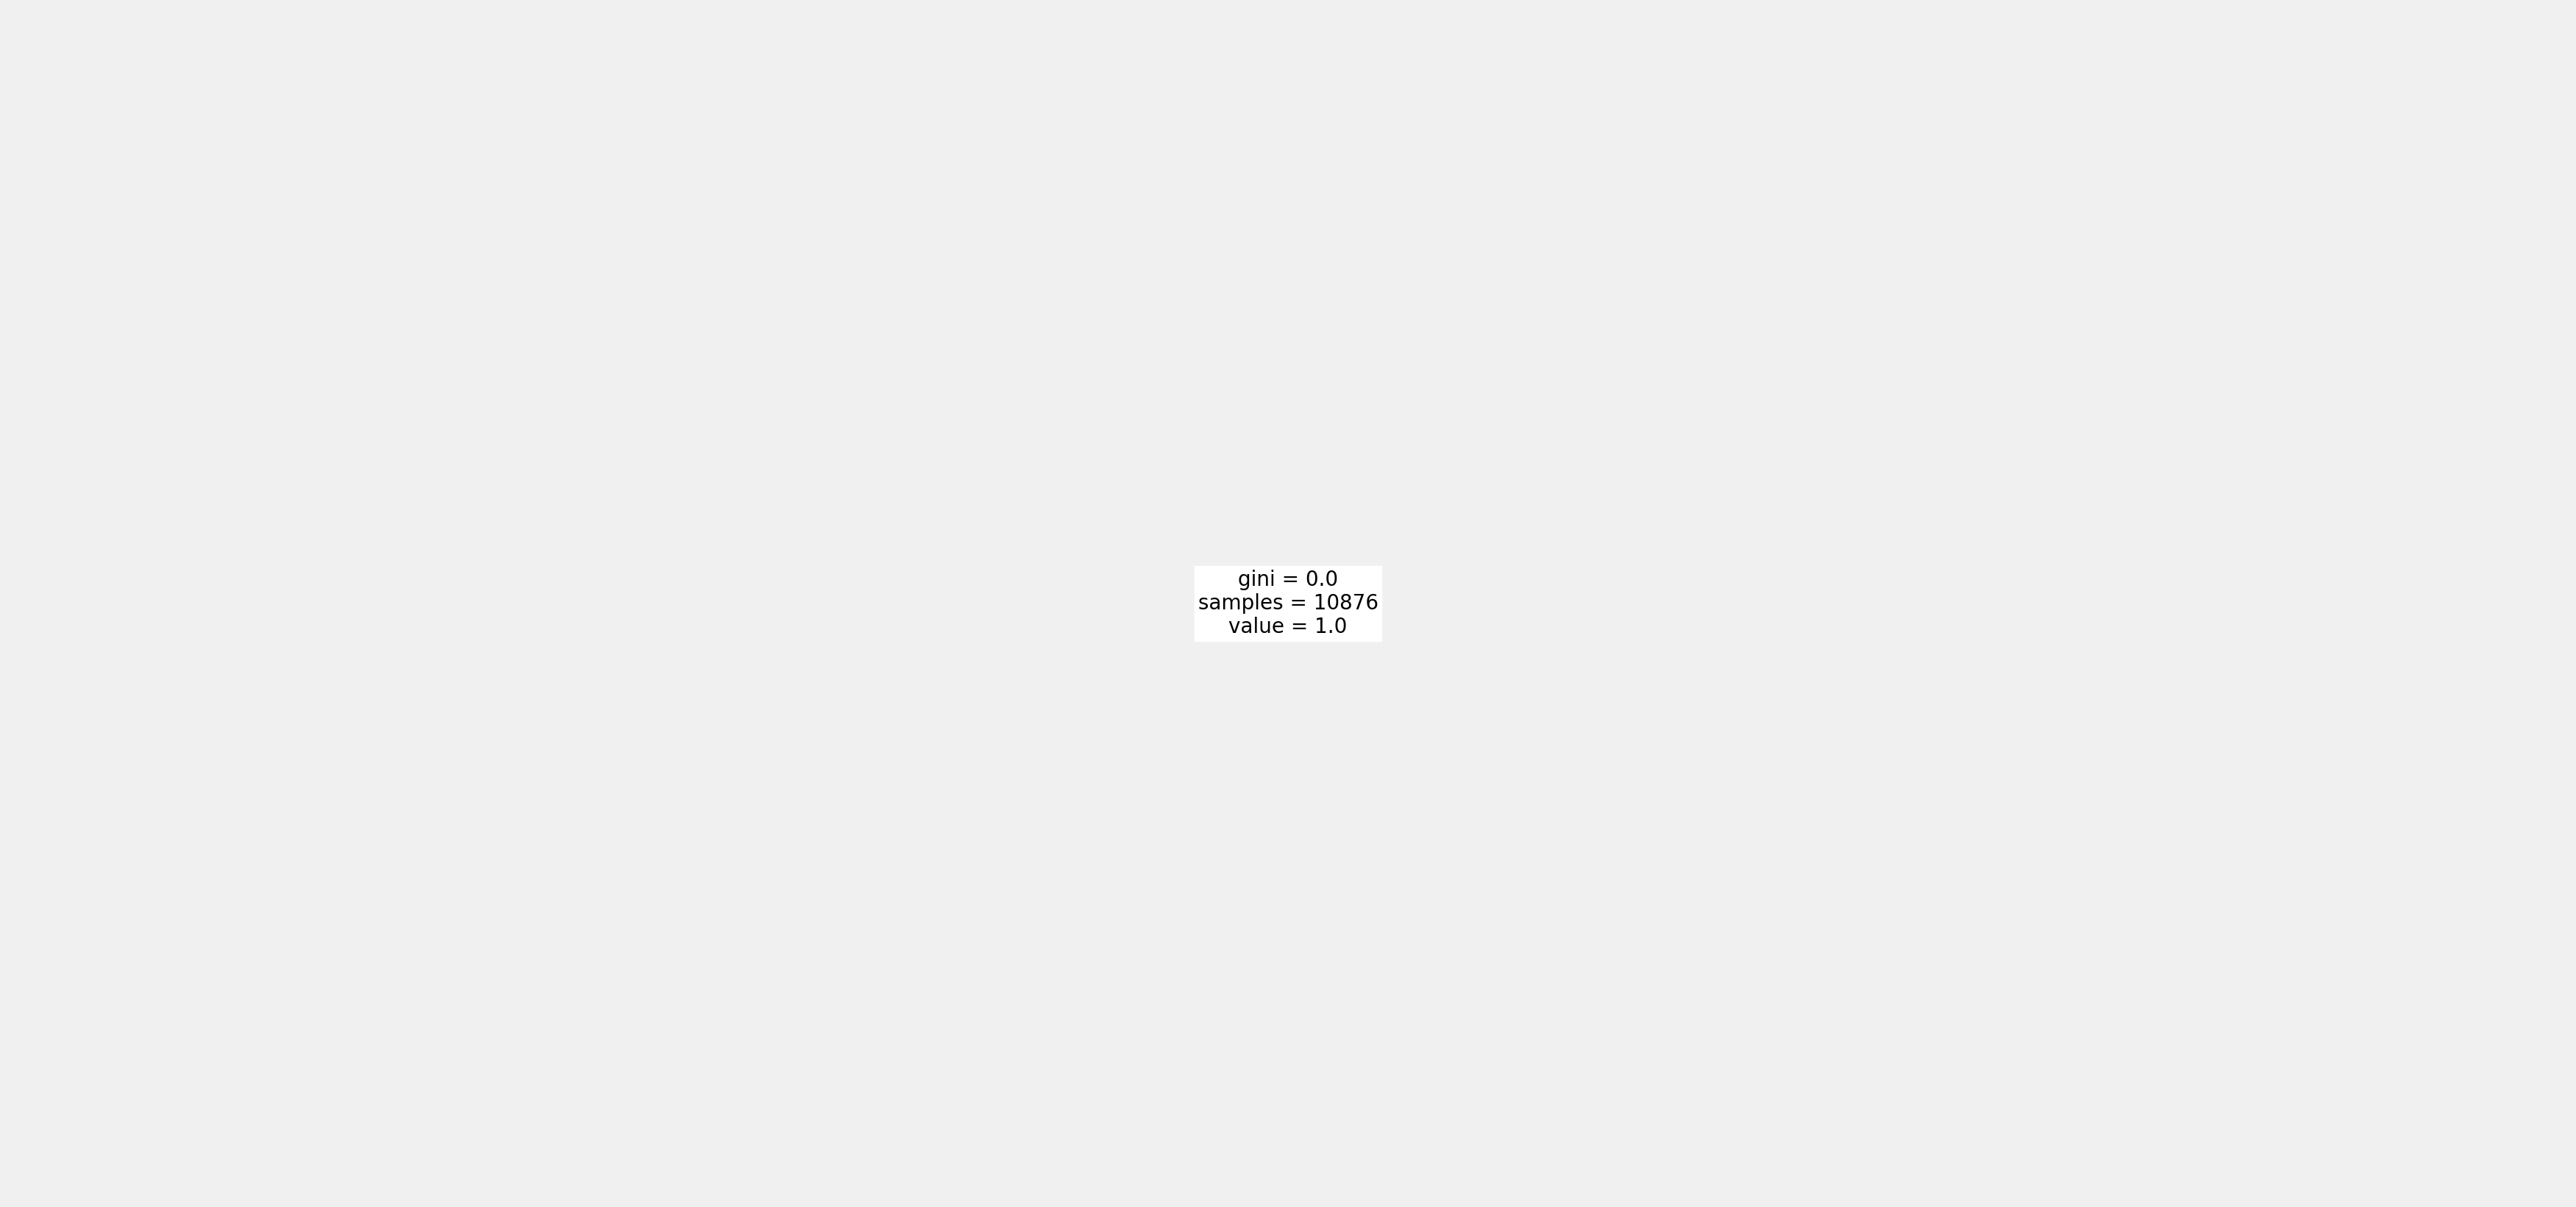

In [239]:
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_sonn.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [245]:
rf_4.savefig(os.path.join(path, 'Figures', 'random_forest_sonnblick.png'))

#### · Importances

In [285]:
importances_4 = clf_4.feature_importances_
print(clf.feature_importances_.shape)
importances_4

(135,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [287]:
importances_df4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': importances_4
})

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


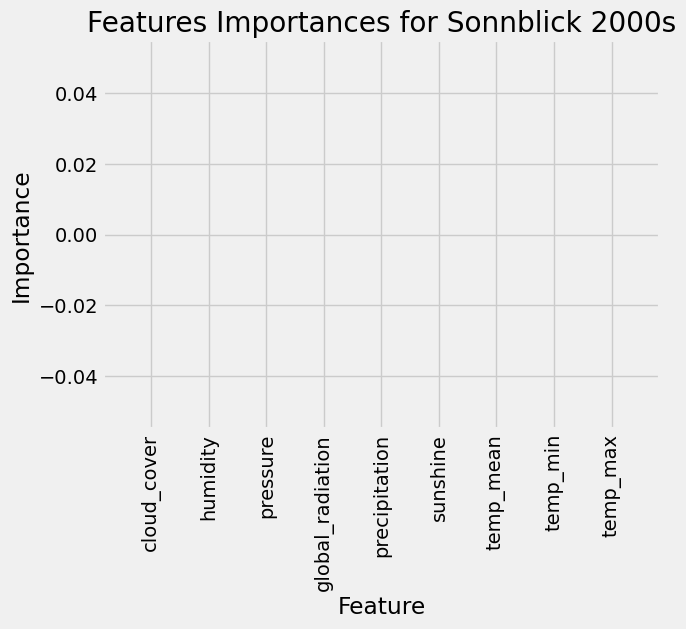

In [297]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x4_values = list(range(len(importances_4)))
print(measurements)

plt.bar(x4_values, importances_4, orientation = 'vertical')
plt.xticks(x4_values, measurements, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Sonnblick 2000s');